In [1]:
import os
import random
from PIL import Image
import numpy as np

In [2]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

/Users/wen/anaconda/envs/tensorflow_py2p7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


/Users/wen/anaconda/envs/tensorflow_py2p7/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [7]:
os.getcwd()

'/Users/wen/Documents/GWU_data_mining/05_neural_networks/src'

In [15]:
root_path = os.path.dirname(os.getcwd())

In [17]:
os.chdir(root_path)
os.getcwd()
wd = os.getcwd() # Get working directory

# Image Directory Structure

```
.
├── testing
│   ├── 0
│   ├── 1
│   ├── 2
│   ├── 3
│   ├── 4
│   ├── 5
│   ├── 6
│   ├── 7
│   ├── 8
│   └── 9
└── training
    ├── 0
    ├── 1
    ├── 2
    ├── 3
    ├── 4
    ├── 5
    ├── 6
    ├── 7
    ├── 8
    └── 9
```

# Explore MNIST

In [18]:
mnist_data_dir = "data/mnist_png"
data_sets = ["training", "testint"]
classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

## View Sample Images
Let's view some sample images

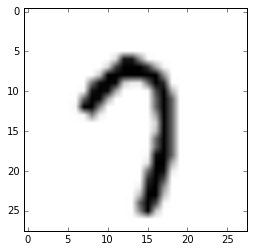

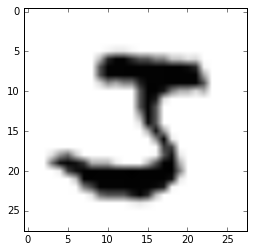

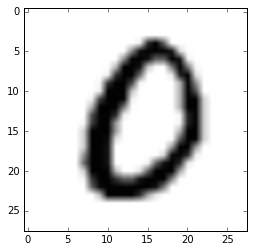

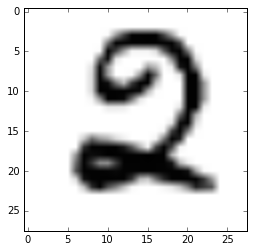

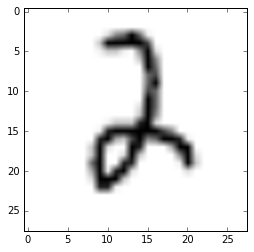

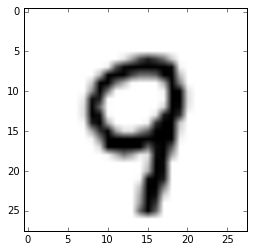

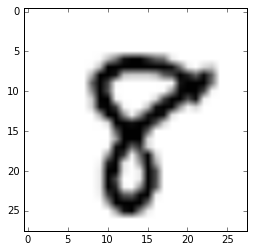

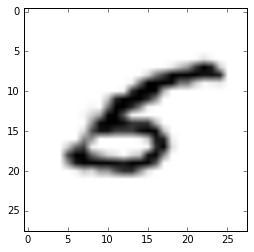

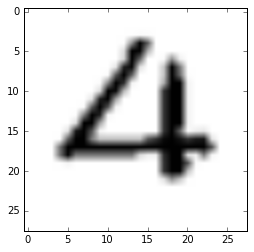

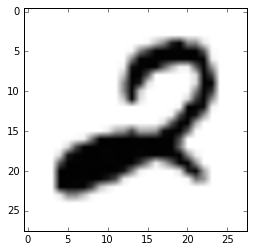

In [19]:
num_sample_images = 10
for x in range(10):
    data_set = "training"
    class_ = random.choice(classes)
    cur_path = os.path.join(mnist_data_dir, data_set, class_)
    image_files = os.listdir(cur_path)
    sample_image = random.choice(image_files)
    cur_image = os.path.join(cur_path, sample_image)
    img=mpimg.imread(cur_image)
    imgplot = plt.imshow(img, cmap="Greys")
    plt.show()

## Image as Pixel Values
We can view the actual pixel values of the image (as a two-dimensional matrix to match the size of the image)

In [20]:
def pretty_print_2d(A):
    print('\n'.join([''.join(['{:4}'.format(item) for item in row]) for row in A]))

In [21]:
img = Image.open(cur_image)
img_arr = np.array(img)
print("Shape: " + str(img_arr.shape))

pretty_print_2d(img_arr)

Shape: (28, 28)
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  92 141 229 253 141 141  44   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0  13 144 206 253 252 252 252 253 252 187   7   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0 144 252 252 253 252 252 252 253 252 252  28   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0  26 243 252 252 253 177 103  28  28 178 252 128   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0  92 253 253 190   0   0   0   0

## Image as Pixel Vector
We can flatten the pixel matrix into a single vector.

In [22]:
img_vec = img_arr.ravel()
print(img_vec)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  13  92 141 229 253 141 141  44   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  13 144 206 253 252 252 252 253 252
 187   7   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 144 252 252 253 252 252 252 253 252 252  28   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  26 243 252 252 253 177 103  28
  28 178 252 128   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0  92 253 253 190   0   0   0   0   0  57 25

# Image Processing Functions

In [23]:
def png_to_vec(path_to_img):
    img = Image.open(path_to_img)
    img_arr = np.array(img)
    return(img_arr.ravel().tolist())

In [24]:
for x in range(10):
    data_set = "training"
    class_ = random.choice(classes)
    cur_path = os.path.join(mnist_data_dir, data_set, class_)
    image_files = os.listdir(cur_path)
    sample_image = random.choice(image_files)
    cur_image = os.path.join(cur_path, sample_image)

In [25]:
nrows_training = 60000
nrows_testing = 10000
samples = 128
samples_training = np.random.choice(classes,samples).tolist()
samples_testing = np.random.choice(classes,samples).tolist()

In [26]:
mnist_data_dir = "data/mnist_png"
data_sets = ["training", "testing"]
list_training_dirs = map(lambda x: os.path.join(mnist_data_dir, "training", x), samples_training)
list_training_dirs = map(lambda x: os.path.join(mnist_data_dir, "testing", x), samples_testing)

In [27]:
list_training_img_path = map(lambda x: os.path.join(x, random.choice(os.listdir(x))), list_training_dirs)
list_testing_img_path = map(lambda x: os.path.join(x, random.choice(os.listdir(x))), list_training_dirs)

In [28]:
list_training_img_vectors = map(lambda x: png_to_vec(x), list_training_img_path)
list_testing_img_vectors = map(lambda x: png_to_vec(x), list_testing_img_path)

# Build Model

In [29]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [30]:
x_train = list_training_img_vectors
y_train = keras.utils.to_categorical(samples_training, num_classes=10)

x_test = list_testing_img_vectors
y_test = keras.utils.to_categorical(samples_testing, num_classes=10)

In [31]:
model = Sequential()

In [32]:
model.add(Dense(64, input_shape=(784,), activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="sigmoid"))

In [33]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [34]:
model.fit(x_train, y_train, epochs=20, batch_size=128)

Epoch 1/20
128/128 [==============================] - 0s - loss: 8.7459 - acc: 0.1094
Epoch 2/20
128/128 [==============================] - 0s - loss: 8.6176 - acc: 0.1016
Epoch 3/20
128/128 [==============================] - 0s - loss: 7.6065 - acc: 0.1016
Epoch 4/20
128/128 [==============================] - 0s - loss: 6.4781 - acc: 0.1016
Epoch 5/20
128/128 [==============================] - 0s - loss: 7.4563 - acc: 0.1172
Epoch 6/20
128/128 [==============================] - 0s - loss: 5.9472 - acc: 0.1172
Epoch 7/20
128/128 [==============================] - 0s - loss: 4.6865 - acc: 0.1172
Epoch 8/20
128/128 [==============================] - 0s - loss: 4.7386 - acc: 0.1094
Epoch 9/20
128/128 [==============================] - 0s - loss: 4.1315 - acc: 0.1172
Epoch 10/20
128/128 [==============================] - 0s - loss: 4.9682 - acc: 0.1016
Epoch 11/20
128/128 [==============================] - 0s - loss: 4.4006 - acc: 0.1016
Epoch 12/20
128/128 [==============================]

In [35]:
model.evaluate(x_test, y_test, batch_size=128)

128/128 [==============================] - 0s


[2.3025848865509033, 0.09375]